In [2]:
import pandas as pd # 引用套件並縮寫為 pd  
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.width',1000)
df = pd.read_csv('/Users/xwlee/Desktop/ECt/hw5/ageinc.csv') 

In [3]:
df.insert(2, column="z_income", value=preprocessing.scale(df['income']))
df.insert(3, column="z_age", value=preprocessing.scale(df['age']))
df

,income,age,z_income,z_age
0,101743,58,0.551088,1.694418
1,49597,27,-0.777720,-1.131131
2,36517,52,-1.111030,1.147537
3,33223,49,-1.194969,0.874097
4,72994,53,-0.181507,1.238684
...,...,...,...,...
995,70615,29,-0.242130,-0.948837
996,95102,41,0.381859,0.144923
997,42203,35,-0.966137,-0.401957
998,16975,31,-1.609008,-0.766544


In [4]:
df1 = df.drop(['income','age'],axis=1)

In [5]:
from sklearn.cluster import KMeans
kmeans_fit = KMeans(n_clusters=2,init="k-means++",n_init=10,max_iter=300,tol=1e-04,random_state=10).fit(df1)
print(kmeans_fit.inertia_)

1190.938561812244


In [6]:
sse_list = [ ] 
K = range(2, 10) 
for k in range(2,10): 
    kmeans_fit=KMeans(n_clusters=k).fit(df1) 
    sse_list.append(kmeans_fit.inertia_)   #model.inertia_返回模型的误差平方和，保存进入列表

print(sse_list)

[1190.938561812244, 735.4003700524152, 386.4566956538551, 341.9971149955688, 301.9054466165438, 269.55877244371123, 240.72221637188045, 216.05676890260577]


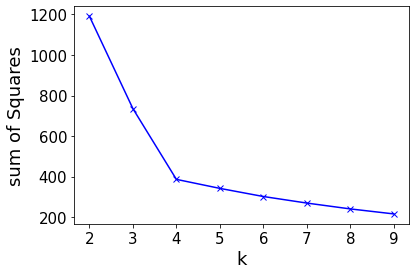

In [7]:
plt.figure() 
plt.plot(np.array(K), sse_list, 'bx-')
plt.rcParams['figure.figsize'] = [12,8]
plt.xlabel('k',fontsize=18)
plt.ylabel('sum of Squares',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [8]:
#最佳分群數為四個
kmeans = KMeans(n_clusters=4,init="k-means++",n_init=10,max_iter=300,tol=1e-04,random_state=10)
kmeans_fit=kmeans.fit(df1)
print(kmeans_fit.inertia_)

386.4566956538551


In [9]:
df.insert(4, column="kmean_cluster", value=kmeans_fit.labels_)
df

,income,age,z_income,z_age,kmean_cluster
0,101743,58,0.551088,1.694418,0
1,49597,27,-0.777720,-1.131131,1
2,36517,52,-1.111030,1.147537,2
3,33223,49,-1.194969,0.874097,2
4,72994,53,-0.181507,1.238684,2
...,...,...,...,...,...
995,70615,29,-0.242130,-0.948837,1
996,95102,41,0.381859,0.144923,0
997,42203,35,-0.966137,-0.401957,1
998,16975,31,-1.609008,-0.766544,1


In [10]:
clusters = kmeans.fit_predict(df1)
print("0的數量：",np.count_nonzero(clusters == 0))
print("1的數量：",np.count_nonzero(clusters == 1))
print("2的數量：",np.count_nonzero(clusters == 2))
print("3的數量：",np.count_nonzero(clusters == 3))

0的數量： 238
1的數量： 258
2的數量： 256
3的數量： 248


In [11]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
df2 = pd.read_csv('/Users/xwlee/Desktop/ECt/hw5/ageinc.csv') 
df2.insert(2, column="z_income", value=preprocessing.scale(df2['income']))
df2.insert(3, column="z_age", value=preprocessing.scale(df2['age']))
df3 = df2.drop(['income','age'],axis=1)
df2

/Users/xwlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


,income,age,z_income,z_age
0,101743,58,0.551088,1.694418
1,49597,27,-0.777720,-1.131131
2,36517,52,-1.111030,1.147537
3,33223,49,-1.194969,0.874097
4,72994,53,-0.181507,1.238684
...,...,...,...,...
995,70615,29,-0.242130,-0.948837
996,95102,41,0.381859,0.144923
997,42203,35,-0.966137,-0.401957
998,16975,31,-1.609008,-0.766544


In [12]:
bandwidth = estimate_bandwidth(df3, quantile=0.1, n_samples=1000)
print("最佳帶寬：",bandwidth)

最佳帶寬： 0.6371390561473768


In [13]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_fit=ms.fit(df3)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


In [14]:
df2.insert(4, column="Mean_shift_cluster", value=ms_fit.labels_)
df2

,income,age,z_income,z_age,Mean_shift_cluster
0,101743,58,0.551088,1.694418,2
1,49597,27,-0.777720,-1.131131,3
2,36517,52,-1.111030,1.147537,0
3,33223,49,-1.194969,0.874097,0
4,72994,53,-0.181507,1.238684,0
...,...,...,...,...,...
995,70615,29,-0.242130,-0.948837,3
996,95102,41,0.381859,0.144923,2
997,42203,35,-0.966137,-0.401957,3
998,16975,31,-1.609008,-0.766544,3


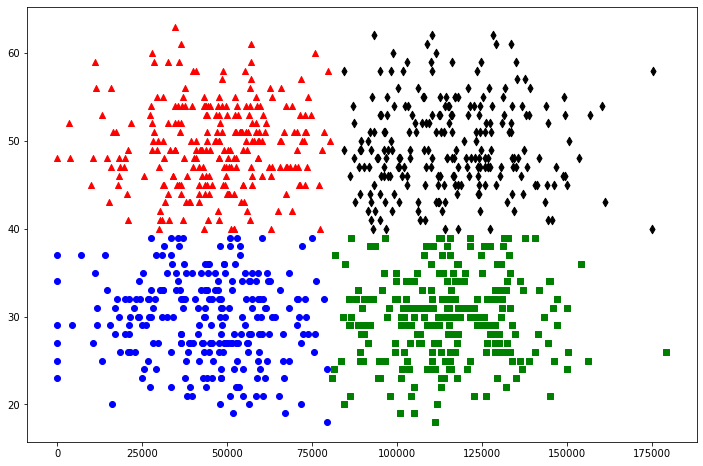

In [16]:
for i in range(len(df)):
    if df['kmean_cluster'].iloc[i]==0:
        plt.scatter(df['income'].iloc[i],df['age'].iloc[i],c="black",marker="d")
    elif df['kmean_cluster'].iloc[i]==1:
        plt.scatter(df['income'].iloc[i],df['age'].iloc[i],c="blue",marker="o")
    elif df['kmean_cluster'].iloc[i]==2:
        plt.scatter(df['income'].iloc[i],df['age'].iloc[i],c="red",marker="^")
    else :
        plt.scatter(df['income'].iloc[i],df['age'].iloc[i],c="green",marker="s")  
plt.show()

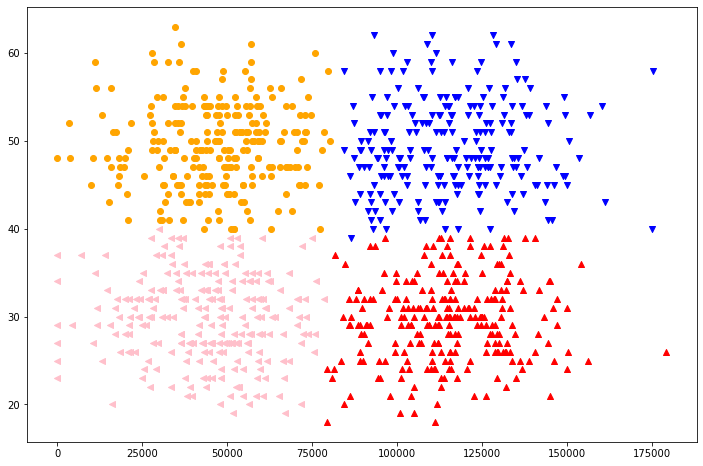

In [17]:
for i in range(len(df2)):
    if df2['Mean_shift_cluster'].iloc[i]==0:
        plt.scatter(df2['income'].iloc[i],df2['age'].iloc[i],c="orange",marker="o")
    elif df2['Mean_shift_cluster'].iloc[i]==1:
        plt.scatter(df2['income'].iloc[i],df2['age'].iloc[i],c="red",marker="^")
    elif df2['Mean_shift_cluster'].iloc[i]==2:
        plt.scatter(df2['income'].iloc[i],df2['age'].iloc[i],c="blue",marker="v")
    else :
        plt.scatter(df2['income'].iloc[i],df2['age'].iloc[i],c="pink",marker="<")
plt.show()

In [18]:
import numpy as np
df4 = pd.read_csv('/Users/xwlee/Desktop/ECt/hw5/age_education.csv') 
df4.insert(2, column="z_age", value=preprocessing.scale(df['age']))
df4

,age,education,z_age
0,27.007219,college,1.694418
1,47.615409,highschool,-1.131131
2,51.382815,highschool,1.147537
3,54.906622,highschool,0.874097
4,27.719939,less_than_highschool,1.238684
...,...,...,...
995,57.550481,less_than_highschool,-0.948837
996,23.726849,college,0.144923
997,52.828647,highschool,-0.401957
998,54.411223,highschool,-0.766544


In [19]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, init='Huang', verbose=1, random_state=10) 
clusters = kproto.fit_predict(df4, categorical=[1])
print("0的數量：",np.count_nonzero(clusters == 0))
print("1的數量：",np.count_nonzero(clusters == 1))
print("2的數量：",np.count_nonzero(clusters == 2))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 79, ncost: 20407.38270774226
Run: 1, iteration: 2/100, moves: 32, ncost: 20142.101817893305
Run: 1, iteration: 3/100, moves: 31, ncost: 19843.959984053265
Run: 1, iteration: 4/100, moves: 37, ncost: 19433.810439129393
Run: 1, iteration: 5/100, moves: 50, ncost: 18472.63746548832
Run: 1, iteration: 6/100, moves: 70, ncost: 17705.28750939557
Run: 1, iteration: 7/100, moves: 54, ncost: 17362.17962103278
Run: 1, iteration: 8/100, moves: 28, ncost: 17289.934685132328
Run: 1, iteration: 9/100, moves: 12, ncost: 17278.559164662856
Run: 1, iteration: 10/100, moves: 3, ncost: 17277.271657708014
Run: 1, iteration: 11/100, moves: 5, ncost: 17275.214900192135
Run: 1, iteration: 12/100, moves: 0, ncost: 17275.214900192135
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 121, ncost: 18102.663689443707
Run: 2, iteration: 2/100

In [20]:
import numpy as np
df5 = pd.read_csv('/Users/xwlee/Desktop/ECt/hw5/customer_offers.csv') 
df5.set_index("customer_name" , inplace=True)

In [21]:
from kmodes.kmodes import KModes
kmo = KModes(n_clusters=4, init='Huang', verbose=0,random_state=10)
clusters = kmo.fit_predict(df5)
print("0的數量：",np.count_nonzero(clusters == 0))
print("1的數量：",np.count_nonzero(clusters == 1))
print("2的數量：",np.count_nonzero(clusters == 2))
print("3的數量：",np.count_nonzero(clusters == 3))

0的數量： 17
1的數量： 61
2的數量： 15
3的數量： 7
